In [1]:
import pandas as pd
import yfinance as yf

In [2]:
import wrds


In [3]:
db = wrds.Connection(wrds_username='rudragarg')

Loading library list...
Done


In [4]:
def get_data(symbol, interval = "1d", period = "max"):
    return yf.download(symbol,interval=interval, period=period)

In [5]:
sp500 = get_data("^GSPC")[["Close"]]

[*********************100%***********************]  1 of 1 completed


In [6]:
sp500.index = pd.to_datetime(sp500.index)


In [7]:
sp500 = sp500.resample('1M').mean()

In [8]:
sp500.index = sp500.index.date

In [9]:
sp500

,Close
1950-01-31,16.875714
1950-02-28,17.192778
1950-03-31,17.346522
1950-04-30,17.845263
1950-05-31,18.434546
...,...
2022-06-30,3898.946684
2022-07-31,3911.729492
2022-08-31,4158.563084
2022-09-30,3850.520496


In [10]:
rf = pd.read_csv("risk_free_1_mo.csv")

In [11]:
rf["date"] = pd.to_datetime(rf["date"].apply(str))

In [12]:
rf = rf.set_index("date")

In [13]:
rf = rf.resample('1M').mean()

In [14]:
rf

,rf
date,
1926-07-31,0.00009
1926-08-31,0.00010
1926-09-30,0.00009
1926-10-31,0.00013
1926-11-30,0.00013
...,...
2022-04-30,0.00001
2022-05-31,0.00001
2022-06-30,0.00003


<AxesSubplot:xlabel='date'>

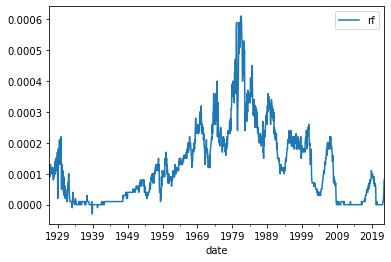

In [15]:
rf.plot()

In [16]:
sp500["mkt_return"] = sp500["Close"].pct_change()

In [17]:
sp500 = sp500[1:]

In [18]:
mkt = pd.merge(sp500, rf, left_index=True, right_index=True)

In [19]:
fff = pd.DataFrame()

In [20]:
fff["mkt-rf"] = mkt["mkt_return"] - mkt["rf"]

In [21]:
fff

,mkt-rf
1950-02-28,0.018748
1950-03-31,0.008902
1950-04-30,0.028712
1950-05-31,0.032982
1950-06-30,0.016357
...,...
2022-04-30,-0.000003
2022-05-31,-0.079926
2022-06-30,-0.035030
2022-07-31,0.003239


In [22]:

# stocks_org = pd.read_csv("all_stocks.csv")
# stocks = stocks_org.copy()
# stocks.drop("PERMNO", axis=1, inplace=True)
# stocks = stocks[stocks["PRC"] > 0]
# stocks = stocks[stocks["SHROUT"] > 0]
# stocks.shape
# stocks["date"] = pd.to_datetime(stocks["date"].apply(str))
# stocks.set_index("date", inplace=True)
# stocks["Market Cap"] = stocks["PRC"] * stocks["SHROUT"]
# stocks
# len(stocks["TICKER"].unique())
# stocks["PRC"].max()

In [23]:
# from unittest import result
# import warnings
# warnings.filterwarnings("ignore")

# returns = pd.DataFrame()
# count = 0
# for firm in stocks["TICKER"].unique():
#     stock = stocks[stocks["TICKER"] == firm]
#     stock_monthly = stock.resample('1M').mean()
#     stock_monthly["return"] = stock_monthly["PRC"].pct_change()
#     stock_monthly["ticker"] = firm
#     #display(stock_monthly)
#     returns = returns.append(stock_monthly, ignore_index=True)
    
#     count += 1
#     if count % 10 == 0:
#         print(count)



In [24]:
stocks = pd.read_csv("monthly_stocks.csv")

/var/folders/m6/h9jtrhyn259fytxp6j9xh9v00000gn/T/ipykernel_65269/1077546959.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  stocks = pd.read_csv("monthly_stocks.csv")


In [25]:
# stocks = stocks_org.copy()


In [26]:
stocks.head()

,PERMNO,Ticker,MthCalDt,MthPrc,ShrOut
0,10000,OMFGA,19860131,4.3750,3680.0
1,10000,OMFGA,19860228,3.2500,3680.0
2,10000,OMFGA,19860331,4.4375,3680.0
3,10000,OMFGA,19860430,4.0000,3793.0
4,10000,OMFGA,19860530,3.1094,3793.0


In [27]:
stocks.dtypes

PERMNO        int64
Ticker       object
MthCalDt      int64
MthPrc       object
ShrOut      float64
dtype: object

In [28]:
stocks['MthPrc'] = pd.to_numeric(stocks['MthPrc'], errors='coerce')

In [29]:
stocks.drop("PERMNO", axis=1, inplace=True)
stocks = stocks[stocks["MthPrc"] > 0]
stocks = stocks[stocks["ShrOut"] > 0]

In [30]:
stocks.rename({"MthCalDt":"date"},axis=1, inplace=True)

In [31]:
stocks["date"] = pd.to_datetime(stocks["date"].apply(str))
stocks.set_index("date", inplace=True)
stocks["Market Cap"] = stocks["MthPrc"] * stocks["ShrOut"]

In [32]:
stocks

,Ticker,MthPrc,ShrOut,Market Cap
date,,,,
1986-01-31,OMFGA,4.3750,3680.0,1.610000e+04
1986-02-28,OMFGA,3.2500,3680.0,1.196000e+04
1986-03-31,OMFGA,4.4375,3680.0,1.633000e+04
1986-04-30,OMFGA,4.0000,3793.0,1.517200e+04
1986-05-30,OMFGA,3.1094,3793.0,1.179395e+04
...,...,...,...,...
2021-07-30,TSLA,687.2000,990015.0,6.803383e+08
2021-08-31,TSLA,735.7200,1001767.0,7.370200e+08
2021-09-30,TSLA,775.4800,1004000.0,7.785819e+08


In [33]:
len(stocks["Ticker"].unique())

27505

In [34]:
stocks.dtypes

Ticker         object
MthPrc        float64
ShrOut        float64
Market Cap    float64
dtype: object

In [35]:
import numpy as np

In [37]:
# current_firm = None
# current_index = 0
# adding_index = []
# for firm in stocks.Ticker:
#     if firm != current_firm:
#         adding_index.append(current_index)
#         current_firm = firm
#     current_index+=1


In [38]:
#adding_index

In [39]:
#len(adding_index)

In [40]:
# line = pd.DataFrame({"Ticker": np.nan, "MthPrc": np.nan, "ShrOut": np.nan, "Market Cap":np.nan}, index=pd.to_datetime(["2030/12/31"]))
# number_added = 0
# for index in adding_index:
#     stocks = pd.concat([stocks.iloc[:index+number_added], line, stocks.iloc[index+number_added:]])
#     if number_added % 100

In [41]:
stocks

,Ticker,MthPrc,ShrOut,Market Cap
date,,,,
1986-01-31,OMFGA,4.3750,3680.0,1.610000e+04
1986-02-28,OMFGA,3.2500,3680.0,1.196000e+04
1986-03-31,OMFGA,4.4375,3680.0,1.633000e+04
1986-04-30,OMFGA,4.0000,3793.0,1.517200e+04
1986-05-30,OMFGA,3.1094,3793.0,1.179395e+04
...,...,...,...,...
2021-07-30,TSLA,687.2000,990015.0,6.803383e+08
2021-08-31,TSLA,735.7200,1001767.0,7.370200e+08
2021-09-30,TSLA,775.4800,1004000.0,7.785819e+08


In [42]:
stocks.dropna(inplace=True)

In [43]:
firms = list(stocks["Ticker"].unique())
firms

['OMFGA',
 'EGAS',
 'BTFG',
 'GCBK',
 'WERC',
 'ACF',
 'SHRD',
 'GACO',
 'IROQ',
 'CBOT',
 'ATCS',
 'DPAC',
 'AAPI',
 'AJ',
 'AMFD',
 'SCTT',
 'CCUR',
 'DCIS',
 'IFRS',
 'KEYC',
 'BIRI',
 'DOCX',
 'AEPI',
 'JJSF',
 'TNII',
 'ELA',
 'AIF',
 'ABK',
 'ANTQ',
 'PLXS',
 'MABK',
 'HCSB',
 'GGUY',
 'NURO',
 'FBCP',
 'POCI',
 'ATCM',
 'HARVY',
 'GGGG',
 'CAU',
 'AATI',
 'RMCF',
 'OLVR',
 'MENU',
 'LMNT',
 'CTYA',
 'ABCC',
 'HNGR',
 'VLVL',
 'CDNI',
 'BNUI',
 'GRAR',
 'NMIL',
 'AMT',
 'ABKC',
 'OFSLY',
 'FSCNY',
 'USBK',
 'ENSO',
 'AHTS',
 'TTI',
 'ADX',
 'FKWL',
 'HYGA',
 'APGI',
 'AJIL',
 'DIGT',
 'AB',
 'SMRX',
 'ABSI',
 'VWRX',
 'SCAT',
 'STRS',
 'JAVA',
 'GCCC',
 'MHCO',
 'ACSE',
 'CMTK',
 'CRCC',
 'UCI',
 'LBSC',
 'BUTI',
 'VRBB',
 'ATGI',
 'AMSE',
 'ITXI',
 'KDE',
 'AIRC',
 'TUES',
 'SYGN',
 'CIBA',
 'FACE',
 'POLY',
 'ABCI',
 'ALRN',
 'PACR',
 'AN',
 'ACSC',
 'ORCL',
 'TPPS',
 'LNSB',
 'MSFT',
 'SDS',
 'MWSB',
 'IFEX',
 'AADR',
 'AKLM',
 'CSBN',
 'ACUR',
 'UMBE',
 'COHY',
 'TW',
 'PJC',

In [44]:
from unittest import result
import warnings
warnings.filterwarnings("ignore")

firms = list(stocks["Ticker"].unique())

returns = pd.DataFrame()
count = 0
for firm in firms: 
    stock_monthly = stocks[stocks["Ticker"] == firm]
    stock_monthly.sort_index()
    #display(stock_monthly)

    stock_monthly["return"] = stock_monthly["MthPrc"].pct_change()
    stock_monthly["ticker"] = firm
    returns = returns.append(stock_monthly, ignore_index=False)
    count += 1
    if count % 100 == 0:
        print((count/len(firms)) * 100)

0.3635834787667248
0.7271669575334496
1.0907504363001745
1.4543339150668992
1.8179173938336242
2.181500872600349
2.545084351367074
2.9086678301337985
3.2722513089005236
3.6358347876672483
3.999418266433973
4.363001745200698
4.726585223967423
5.090168702734148
5.453752181500873
5.817335660267597
6.180919139034322
6.544502617801047
6.908086096567772
7.271669575334497
7.635253054101223
7.998836532867946
8.362420011634672
8.726003490401396
9.089586969168122
9.453170447934847
9.81675392670157
10.180337405468295
10.543920884235021
10.907504363001745
11.271087841768471
11.634671320535194
11.99825479930192
12.361838278068644
12.72542175683537
13.089005235602095
13.452588714368819
13.816172193135545
14.179755671902269
14.543339150668993
14.906922629435718
15.270506108202445
15.634089586969168
15.997673065735892
16.361256544502616
16.724840023269344
17.08842350203607
17.452006980802793
17.815590459569517
18.179173938336245
18.54275741710297
18.906340895869693
19.269924374636417
19.63350785340314

In [45]:
stock_monthly

,Ticker,MthPrc,ShrOut,Market Cap,return,ticker
date,,,,,,
2010-06-30,TSLA,23.830,93198.0,2.220908e+06,NaN,TSLA
2010-07-30,TSLA,19.940,93198.0,1.858368e+06,-0.163240,TSLA
2010-08-31,TSLA,19.480,93198.0,1.815497e+06,-0.023069,TSLA
2010-09-30,TSLA,20.405,93253.0,1.902827e+06,0.047485,TSLA
2010-10-29,TSLA,21.840,93271.0,2.037039e+06,0.070326,TSLA
...,...,...,...,...,...,...
2021-07-30,TSLA,687.200,990015.0,6.803383e+08,0.011034,TSLA
2021-08-31,TSLA,735.720,1001767.0,7.370200e+08,0.070605,TSLA
2021-09-30,TSLA,775.480,1004000.0,7.785819e+08,0.054042,TSLA


In [46]:
returns

,Ticker,MthPrc,ShrOut,Market Cap,return,ticker
date,,,,,,
1986-01-31,OMFGA,4.3750,3680.0,1.610000e+04,NaN,OMFGA
1986-02-28,OMFGA,3.2500,3680.0,1.196000e+04,-0.257143,OMFGA
1986-03-31,OMFGA,4.4375,3680.0,1.633000e+04,0.365385,OMFGA
1986-04-30,OMFGA,4.0000,3793.0,1.517200e+04,-0.098592,OMFGA
1986-05-30,OMFGA,3.1094,3793.0,1.179395e+04,-0.222650,OMFGA
...,...,...,...,...,...,...
2021-07-30,TSLA,687.2000,990015.0,6.803383e+08,0.011034,TSLA
2021-08-31,TSLA,735.7200,1001767.0,7.370200e+08,0.070605,TSLA
2021-09-30,TSLA,775.4800,1004000.0,7.785819e+08,0.054042,TSLA


In [47]:
returns.to_csv("monthly_returns.csv")

In [106]:
returns.dropna(inplace=True)

In [107]:
returns

,Ticker,MthPrc,ShrOut,Market Cap,return,ticker
date,,,,,,
2010-07-30,TSLA,19.940,93198.0,1.858368e+06,-0.163240,OMFGA
2010-08-31,TSLA,19.480,93198.0,1.815497e+06,-0.023069,OMFGA
2010-09-30,TSLA,20.405,93253.0,1.902827e+06,0.047485,OMFGA
2010-10-29,TSLA,21.840,93271.0,2.037039e+06,0.070326,OMFGA
2010-11-30,TSLA,35.330,93271.0,3.295264e+06,0.617674,OMFGA
...,...,...,...,...,...,...
2021-07-30,TSLA,687.200,990015.0,6.803383e+08,0.011034,TSLA
2021-08-31,TSLA,735.720,1001767.0,7.370200e+08,0.070605,TSLA
2021-09-30,TSLA,775.480,1004000.0,7.785819e+08,0.054042,TSLA


In [16]:
# comp = db.raw_sql("""
#                     select cusip, permno, permco, issuno, prc, shrout
#                     from crsp.dsf
                    
#                 """)


KeyboardInterrupt: 

In [ ]:
# comp = db.raw_sql("""
#                     select cusip, permno, permco, issuno, prc, shrout
#                     from crsp.dsf
                    
#                 """)


KeyboardInterrupt: 

In [24]:
# comp = db.raw_sql("""
#                     select gvkey, datadate, at, pstkl, txditc,
#                     pstkrv, seq, pstk
#                     from comp.funda
#                     where indfmt='INDL' 
#                     and datafmt='STD'
#                     and popsrc='D'
#                     and consol='C'
#                     and datadate >= '01/01/1959'
#                     """, date_cols=['datadate'])

'''
Ticker Symbol (TIC)

Company Name (CONM)

GVKEY -- Global Company Key (GVKEY)

AT -- Assets - Total (AT)

PSTKL -- Preferred Stock Liquidating Value (PSTKL)

TXDITC -- Deferred Taxes and Investment Tax Credit (TXDITC)

PSTKRV -- Preferred Stock Redemption Value (PSTKRV)

SEQ -- Stockholders' Equity - Total (SEQ)

PSTK -- Preferred/Preference Stock (Capital) - Total (PSTK)

LT -- Liabilities - Total (LT)

'''

comp = db.raw_sql("""
                    select datadate, conm, tic, at, lt
                    from comp.funda
                   
                    """, date_cols=['datadate'])



In [25]:
comp["book_value"] = comp["at"] - comp["lt"]

In [26]:
comp

,datadate,conm,tic,at,lt,book_value
0,1961-12-31,A & E PLASTIK PAK INC,AE.2,NaN,NaN,NaN
1,1962-12-31,A & E PLASTIK PAK INC,AE.2,NaN,NaN,NaN
2,1963-12-31,A & E PLASTIK PAK INC,AE.2,NaN,0.345,NaN
3,1964-12-31,A & E PLASTIK PAK INC,AE.2,1.416,0.809,0.607
4,1965-12-31,A & E PLASTIK PAK INC,AE.2,2.310,1.818,0.492
...,...,...,...,...,...,...
360575,2019-12-31,DAIMLER TRUCK HOLDING AG,DTRUY,62131.888,50522.908,11608.980
360576,2020-12-31,DAIMLER TRUCK HOLDING AG,DTRUY,60256.041,49759.540,10496.501
360577,2021-12-31,DAIMLER TRUCK HOLDING AG,DTRUY,62325.449,43647.149,18678.300
360578,2021-12-31,HALEON PLC,HLN,46650.000,10793.000,35857.000


In [29]:
comp = comp.dropna()

In [32]:
len(comp.conm.unique())

35866

array([[<AxesSubplot:title={'center':'datadate'}>]], dtype=object)

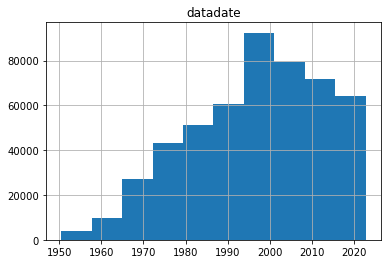

In [30]:
comp.hist("datadate")

In [ ]:
# comp = db.raw_sql("""
#                     select gvkey, datadate, at, pstkl, txditc,
#                     pstkrv, seq, pstk
#                     from comp.funda
#                     where indfmt='INDL' 
#                     and datafmt='STD'
#                     and popsrc='D'
#                     and consol='C'
#                     and datadate >= '01/01/1959'
#                     """, date_cols=['datadate'])

'''
Ticker Symbol (TIC)

Company Name (CONM)

GVKEY -- Global Company Key (GVKEY)

AT -- Assets - Total (AT)

PSTKL -- Preferred Stock Liquidating Value (PSTKL)

TXDITC -- Deferred Taxes and Investment Tax Credit (TXDITC)

PSTKRV -- Preferred Stock Redemption Value (PSTKRV)

SEQ -- Stockholders' Equity - Total (SEQ)

PSTK -- Preferred/Preference Stock (Capital) - Total (PSTK)

LT -- Liabilities - Total (LT)

'''

comp = db.raw_sql("""
                    select datadate, conm, tic, at,lt
                    from comp.funda
                    where indfmt='INDL' 
                    and datafmt='STD'
                    and popsrc='D'
                    and consol='C'
                    and datadate >= '01/01/1950'
                    """, date_cols=['datadate'])



In [ ]:
comp["book_value"] = comp["at"] - comp["lt"]